In [1]:
# Homeowork 9 continued

In [2]:
# Below I have copied what I have already done towards this homework


In [3]:
# Importing requests so Python can capture data from my raw github (I later changed to use the pd.read_csv command)
import requests

# Importing pandas to make data tables
import pandas as pd

# Getting pandas to make a dataframe from the unemployment data uploaded to my github

url1 = "https://raw.githubusercontent.com/EliezerMeyer/EliezerMeyer.github.io/main/England%20Unemployment%20Data.csv"
unemploymentdata = pd.read_csv(url1)
df1 = pd.DataFrame(unemploymentdata)
print(df1)

# Getting pandas to make a dataframe from the homelessness data uploaded to my github

url2 = "https://raw.githubusercontent.com/EliezerMeyer/EliezerMeyer.github.io/main/England%20Homlessness%20Data.csv"
homelessnessdata = pd.read_csv(url2)
df2 = pd.DataFrame(homelessnessdata)
print(df2)

# Performing the data join
df3 = df1.join(df2,rsuffix="_right")

# Changing the settings in pandas so I can see the whole dataframe to confirm whether the task has been done right

pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df3)

# Time for advanced analytics

# Importing helpful libraries

import matplotlib.pyplot as plt
import numpy as np

# Making it easier to plot the data

x = df3["Year"].values
y1 = df3[df3.columns[1]]
y2 = df3[df3.columns[3]]

# Importing Searborn

import seaborn as sns

# Making sure the final figure is a size that matches my other charts

sns.set(rc = {'figure.figsize': (5.729,5.729)})

# Running a regression to see the relationship between the unemployment rate and the number of people who had to sleep rough one night in Autumn in England

sns.regplot(x=y1, y=y2)
plt.xlabel('Unemployment Rate (%)', size=12)
plt.ylabel('Number of People Homeless for at least one night in Autumn', size=12)
plt.title('Unemployment and Homelessness')
plt.savefig(r'C:\Users\meyer\github\EliezerMeyer.github.io\Homework9_regressionimage.png')


    Year  Unemployment Rate 
0   2010                 7.8
1   2011                 8.1
2   2012                 7.9
3   2013                 7.6
4   2014                 6.2
5   2015                 5.3
6   2016                 4.8
7   2017                 4.4
8   2018                 4.1
9   2019                 3.9
10  2020                 4.7
    Year   Number of People Homeless for at least 1 Night
0   2010                                             1768
1   2011                                             2181
2   2012                                             2309
3   2013                                             2414
4   2014                                             2744
5   2015                                             3569
6   2016                                             4134
7   2017                                             4751
8   2018                                             4677
9   2019                                             4266
10  2020      

In [4]:
# I continue from here

In [5]:
# Importing the necessary packages from sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)

In [10]:
y = y2
x = y1

In [29]:
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 11)
yfit = model.predict(xfit[:, np.newaxis])



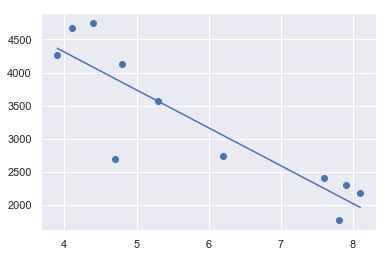

In [30]:
plt.scatter(x,y)
plt.plot(xfit, yfit)


In [31]:
# This matches the regression I performed with Seaborn, now I want to take the xfit values and yfit values, add them to my dataframe and then plot them on vega lite

In [36]:
df4 = pd.DataFrame(xfit)
df5 = pd.DataFrame(yfit)





In [41]:
df4.columns=["xfit"]
df4

,xfit
0,3.90
1,4.32
2,4.74
3,5.16
4,5.58
5,6.00
6,6.42
7,6.84
8,7.26
9,7.68


In [43]:
df5.columns=["yfit"]
df5

,yfit
0,4365.516633
1,4125.413124
2,3885.309615
3,3645.206106
4,3405.102597
5,3164.999089
6,2924.895580
7,2684.792071
8,2444.688562
9,2204.585053


In [46]:
# Time to join all of the dataframes

In [45]:
df6=df3.join(df4)
df6


,Year,Unemployment Rate,Year_right,Number of People Homeless for at least 1 Night,xfit
0,2010,7.8,2010,1768,3.90
1,2011,8.1,2011,2181,4.32
2,2012,7.9,2012,2309,4.74
3,2013,7.6,2013,2414,5.16
4,2014,6.2,2014,2744,5.58
5,2015,5.3,2015,3569,6.00
6,2016,4.8,2016,4134,6.42
7,2017,4.4,2017,4751,6.84
8,2018,4.1,2018,4677,7.26
9,2019,3.9,2019,4266,7.68


In [47]:
df7=df6.join(df5)
df7

,Year,Unemployment Rate,Year_right,Number of People Homeless for at least 1 Night,xfit,yfit
0,2010,7.8,2010,1768,3.90,4365.516633
1,2011,8.1,2011,2181,4.32,4125.413124
2,2012,7.9,2012,2309,4.74,3885.309615
3,2013,7.6,2013,2414,5.16,3645.206106
4,2014,6.2,2014,2744,5.58,3405.102597
5,2015,5.3,2015,3569,6.00,3164.999089
6,2016,4.8,2016,4134,6.42,2924.895580
7,2017,4.4,2017,4751,6.84,2684.792071
8,2018,4.1,2018,4677,7.26,2444.688562
9,2019,3.9,2019,4266,7.68,2204.585053


In [48]:
# Now saving this new dataframe to a csv which can be used to recreate the chart on vegalite

In [49]:
df7.to_csv(r'C:\Users\meyer\github\EliezerMeyer.github.io\regression_homework_final_data.csv')